# About this Notebook

This is a Python notebook. This is the notebook you'll use to run and create the analysis code on pickle data sets. Pickle files are created and premanufactured from ROOT files from MicroBooNE LAr experiment.

You should have access to: example_neutrino.ipynb, neutrino_function.py, data folder. You are free to modify neutrino_function.py or create your own plotting functions.

**IMPORTANT:** It is strongly recommended that only **one** student of a lab pair should edit this notebook and the files contained within the server directories. This is because both students cannot see the same live edit of the notebook or files at the same time, and it is easy to accidently overwrite each other.

# All imports

The basic libraries, you may import more if there are present on the server's environment

In [1]:
import numpy as np
import uproot3
import pickle

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import Neutrino_functions

from math import *
import scipy as sci
import scipy.optimize

# Opening the MC and data frames

In [2]:
# MC
MC_file = './data/MC_EXT_flattened.pkl'

# Data
data_file = './data/data_flattened.pkl'


# Open file as pandas dataframe
MC_EXT = pd.read_pickle(MC_file)
data = pd.read_pickle(data_file)

# You can display the dataframe by uncommenting these lines and running the cell

In [3]:
# Uncomment these lines to display the dataframes
pd.set_option('display.max_columns', 100)
data.head(10)

,_closestNuCosmicDist,trk_len_v,trk_distance_v,category,topological_score,trk_sce_end_z_v,trk_sce_end_y_v,trk_sce_end_x_v,trk_score_v,trk_llr_pid_score_v,trk_sce_start_z_v,trk_sce_start_y_v,trk_sce_start_x_v,reco_nu_vtx_sce_x,reco_nu_vtx_sce_y,reco_nu_vtx_sce_z,trk_energy_tot,Subevent
0,48.170196,230.178085,0.289455,0,0.932121,662.713745,-10.419758,0.564317,1.0,0.981798,443.558472,-71.411057,32.10228,32.137272,-71.675980,443.439148,10000.021584,0
1,48.170196,19.862617,20.065849,0,0.932121,467.605438,-41.015533,40.286861,0.460725,0.722245,455.0065,-55.723381,36.461731,32.137272,-71.675980,443.439148,10000.021584,1
3,177.083498,174.338699,0.057629,0,0.588847,978.765259,9.115969,153.437668,0.999995,0.970214,852.828674,-36.029785,42.856102,42.869896,-35.978130,852.848938,0.629191,0
10,0.067737,264.553223,196.515564,0,0.002079,998.799072,18.552534,225.164139,1.0,0.977688,797.282776,63.213791,63.001648,160.463943,-113.297066,772.441833,10000.778217,0
11,36.361293,493.096283,0.465464,0,0.983048,865.795166,-56.678547,80.313004,1.0,0.990403,408.639801,96.316406,141.032898,141.039246,96.385994,408.178772,1.296849,0
13,127.613429,181.327194,0.272344,0,0.021950,264.979065,92.158607,255.202988,0.999972,0.958479,230.559982,-81.870941,221.46637,221.349503,-81.868439,230.311829,9999.794868,0
14,127.613429,10.863928,0.334015,0,0.021950,226.903671,-91.896515,218.480057,0.791141,-0.287616,229.998383,-81.993217,221.4086,221.349503,-81.868439,230.311829,9999.794868,1
16,101.562292,8.869122,265.905823,0,0.036152,110.97657,81.228905,30.3652,0.011572,0.133134,114.274597,86.827835,36.310745,170.431870,59.736755,340.503021,9999.221455,0
19,181.173178,168.925873,0.349405,0,0.517549,517.184326,67.922836,156.103348,0.999998,0.959285,406.7724,114.33268,40.269585,40.016575,114.483635,406.585693,9999.828041,0
37,162.177990,47.523987,0.030297,0,0.336266,892.599304,-59.251465,37.77512,0.93185,0.761358,870.96521,-33.337875,71.00219,71.004707,-33.363049,870.948181,0.286233,0


# This command, when ran, shows you the different inputs you can give the function

You can access this function. It is present in Neutrino_functions.py. You can create your own plotting function if you wish.

In [4]:
#This command shows what input you should give the plotting function. The inputs with =None can be left out when calling the function
help(Neutrino_functions.histogram_plot)

Help on function histogram_plot in module Neutrino_functions:

histogram_plot(MC_frame, variable, bins, name, scaling, xlims=[], plot_fig=True, plot_data=False, logscale=None, dataFrame=None, Stat_func=None)
    MC_frame: pandas dataframe - MC dataframe
    variable: string - name of the variable
    bins: int - number of bins
    name: string - name of the plot. The plot is saved
    scaling: array/list - weights you want to apply on MC data
    plot_data: boolean - if True then plots data as well
    logscale: boolean - if True then y axis is log scale
    dataFrame: pandas dataframe - data dataframe



# Make your selections here

Modify selection cuts. Remember to cut the same variables in both data sets.

In [5]:
def Selections(frame):
    
    # Basic variables present in dataframe
    trk_start_x_v = frame['trk_sce_start_x_v']
    trk_start_y_v = frame['trk_sce_start_y_v']
    trk_start_z_v = frame['trk_sce_start_z_v']
    trk_end_x_v = frame['trk_sce_end_x_v']
    trk_end_y_v = frame['trk_sce_end_y_v']
    trk_end_z_v = frame['trk_sce_end_z_v'] 
    reco_x = frame['reco_nu_vtx_sce_x']
    reco_y = frame['reco_nu_vtx_sce_y']
    reco_z = frame['reco_nu_vtx_sce_z']
    topological = frame['topological_score']
    trk_score_v = frame['trk_score_v']
    trk_dis_v = frame['trk_distance_v']
    trk_len_v = frame['trk_len_v']
    trk_energy_tot = frame['trk_energy_tot']
    
    # adding in nucosmic distance
    cosmic_distance = frame['_closestNuCosmicDist']
    
    cat = frame['category']
    
    # List of [signal entries , purity , label]. Can be appended each selection cut
    #event = []
    #event.append([len(frame[cat==21]['category']),len(frame[cat==21]['category'])/len(frame['category']),'basic'])
    
    
    # select the conditions you want to apply 
    # The example here removes tracks of lengths that are greater than 1000 cm
    selection =  ((trk_len_v > -1000) & (trk_len_v < 1000))
    
    # limit the fiducial volume (only need to apply this once, maybe use hard limits on one of the spatial coordinates)
    #selection = selection & (trk_start_x_v < np.max(trk_start_x_v)*0.99) & (trk_start_x_v > np.max(trk_start_x_v)*0.01)
    #selection = selection & (trk_start_y_v < np.max(trk_start_y_v)*0.99) & (trk_start_y_v > np.max(trk_start_y_v)*0.01)
    #selection = selection & (trk_start_z_v < np.max(trk_start_z_v)*0.99) & (trk_start_z_v > np.max(trk_start_z_v)*0.01)
    
    # one more cut as the above one is imperfect
    ###selection = selection & (trk_end_x_v < 250) & (trk_end_x_v > 10)
    ###selection = selection & (trk_start_x_v < 250) & (trk_start_x_v > 10)
    
    # remove the massive energy spike thats unphysical
    selection = selection & (trk_energy_tot < 4)
    
    # remove the 0 component from nu cosmic distance
    ###selection = selection & (cosmic_distance > 10)
    
    # take out topological score below a certain value (0.4)
    selection = selection & (topological > 0.2)
    
    # remove trk_len_v values below 200
    ###selection = selection & (trk_len_v > 200)
    
    # separate frame from frame_selection to allow for efficiency calculations
    frame_selection = frame[selection]
    
    # quick check to see if the table has any truth data (as this code is run on the real data as well as MC data) 
    # bit of a janky solution currently but it'll do
    
    if (len(frame[cat==21]['category']) != 0):
        # before applying, calculate efficiency and purity in here (its easier!)
        efficiency = len(frame_selection[cat==21]['category'])/len(frame[cat==21]['category'])
        purity = len(frame_selection[cat==21]['category'])/len(frame_selection)
        print("WARNING: Cutting efficiency will only be accurate across first application, after that point it will be set to 1.00.\nCutting Efficiency: {:.2f}\nCutting Purity: {:.2f}".format(efficiency, purity))

    # Apply selection on dataframe
    frame = frame_selection
    
    return frame

# Calls the selection function on the dataframes

In [6]:
MC_EXT = Selections(MC_EXT)
data_frame = Selections(data)
# be careful here, as you're trimming a trimmed dataset if you adjust the selections after running this file!

/tmp/ipykernel_51068/178914200.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  efficiency = len(frame_selection[cat==21]['category'])/len(frame[cat==21]['category'])
/tmp/ipykernel_51068/178914200.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purity = len(frame_selection[cat==21]['category'])/len(frame_selection)


Cutting Efficiency: 0.39
Cutting Purity: 0.86


# Plot all variables and decide on selection cuts

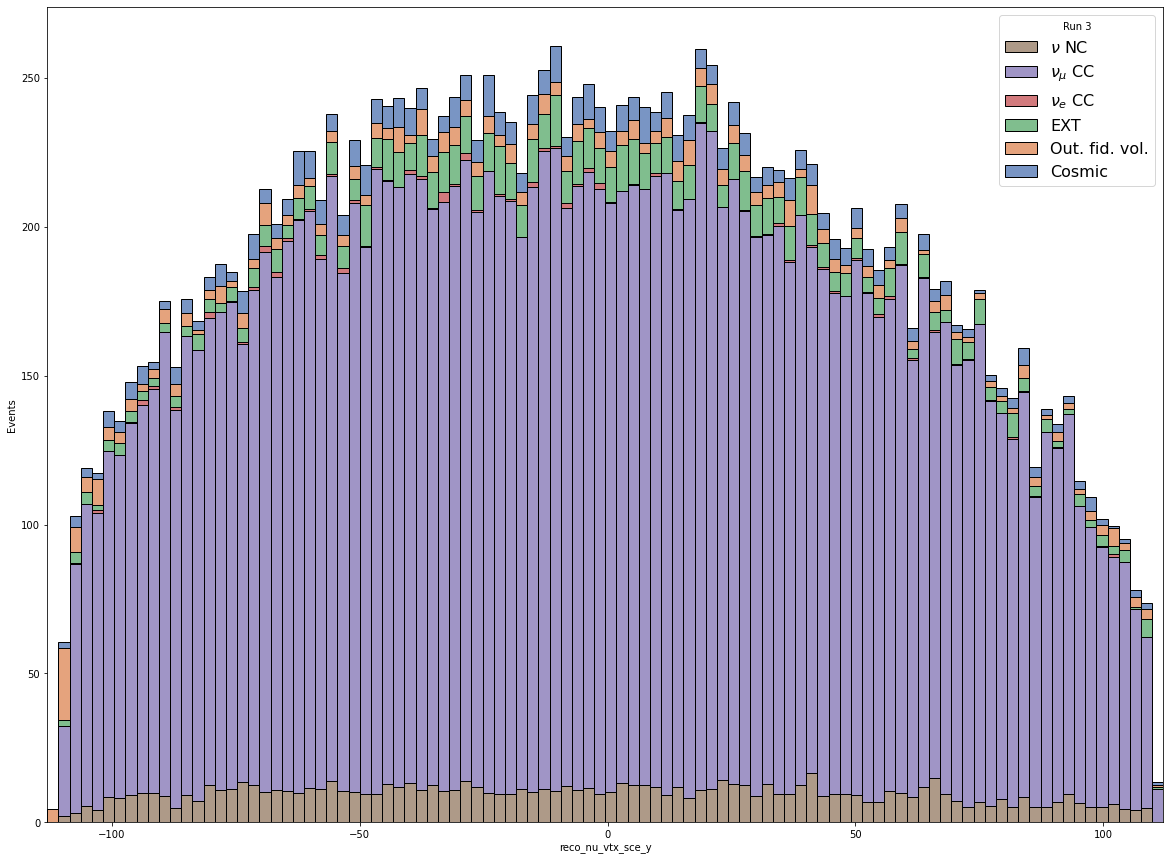

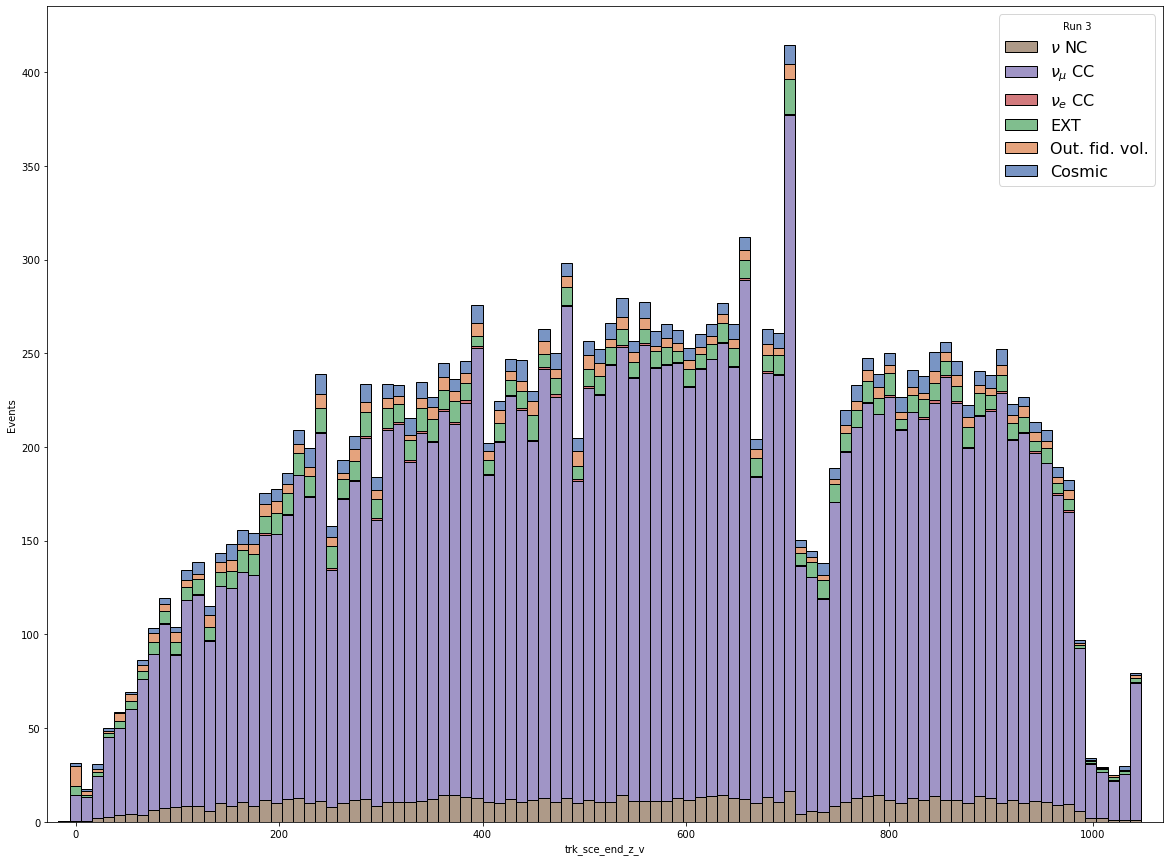

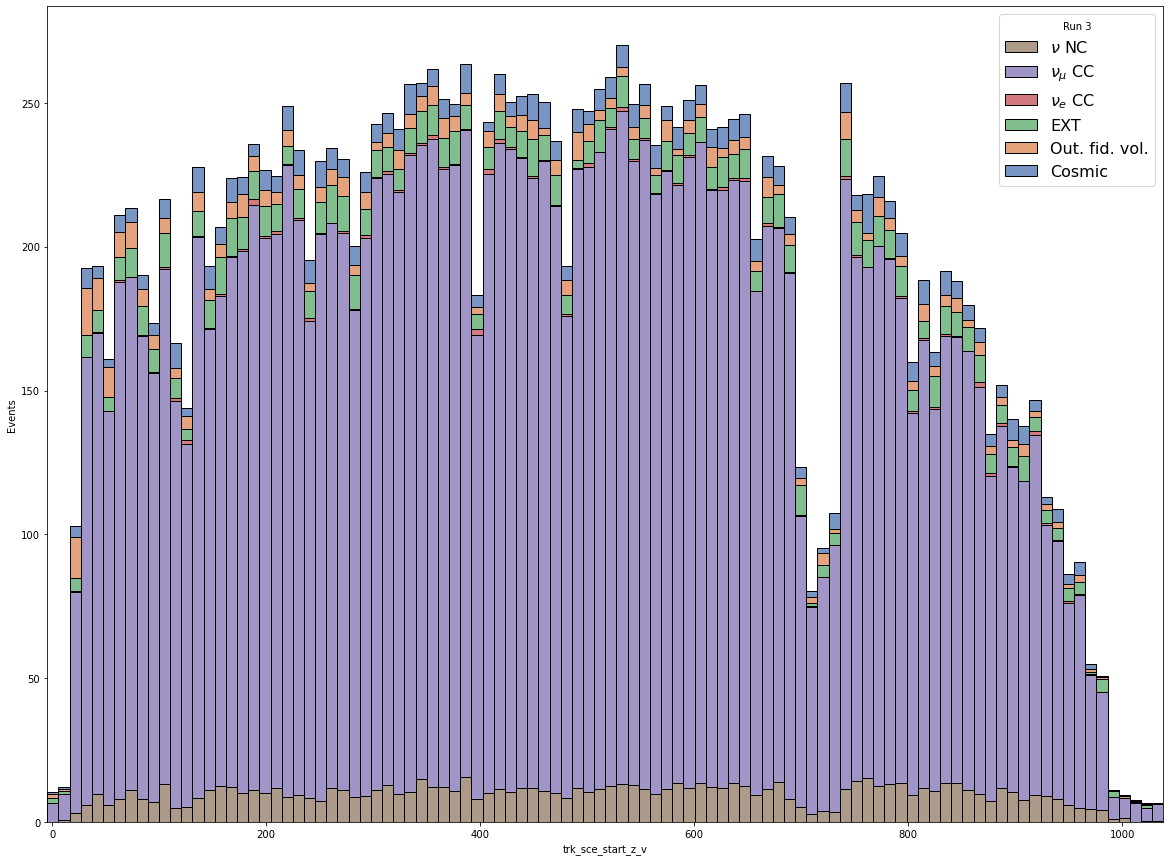

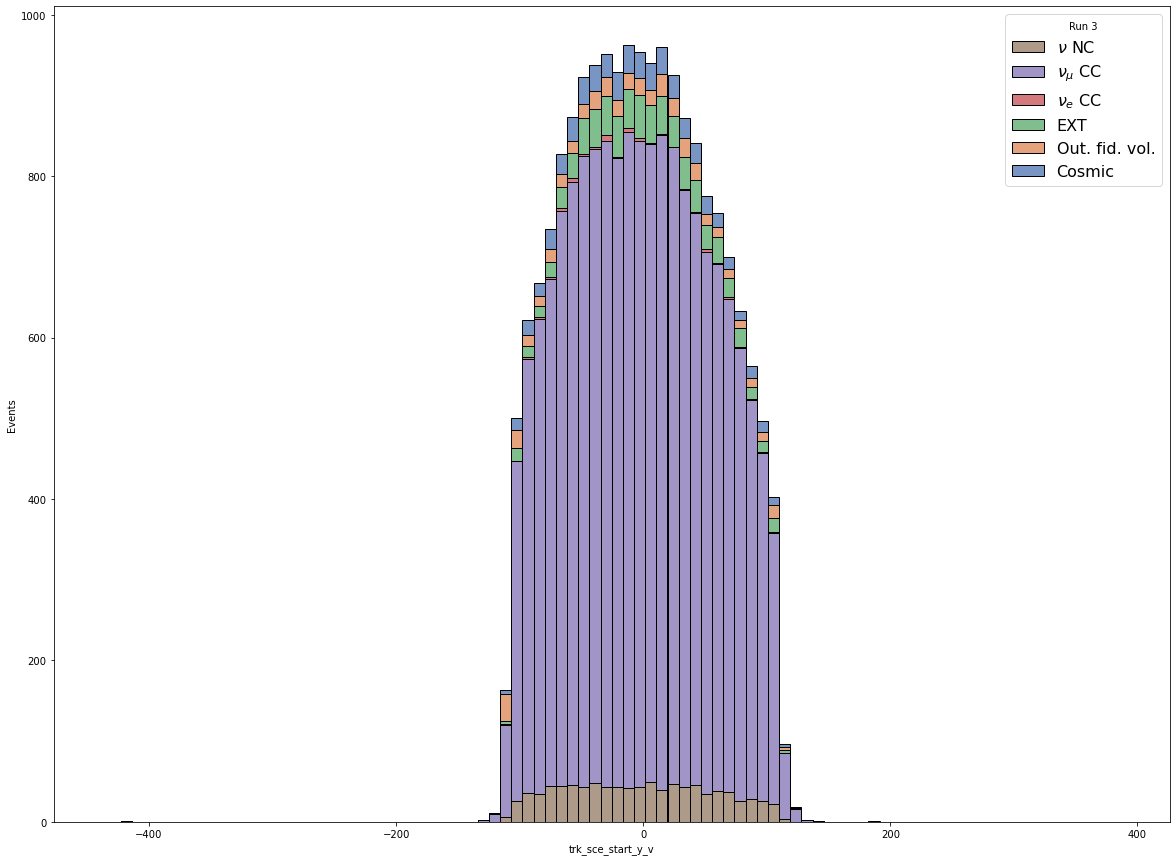

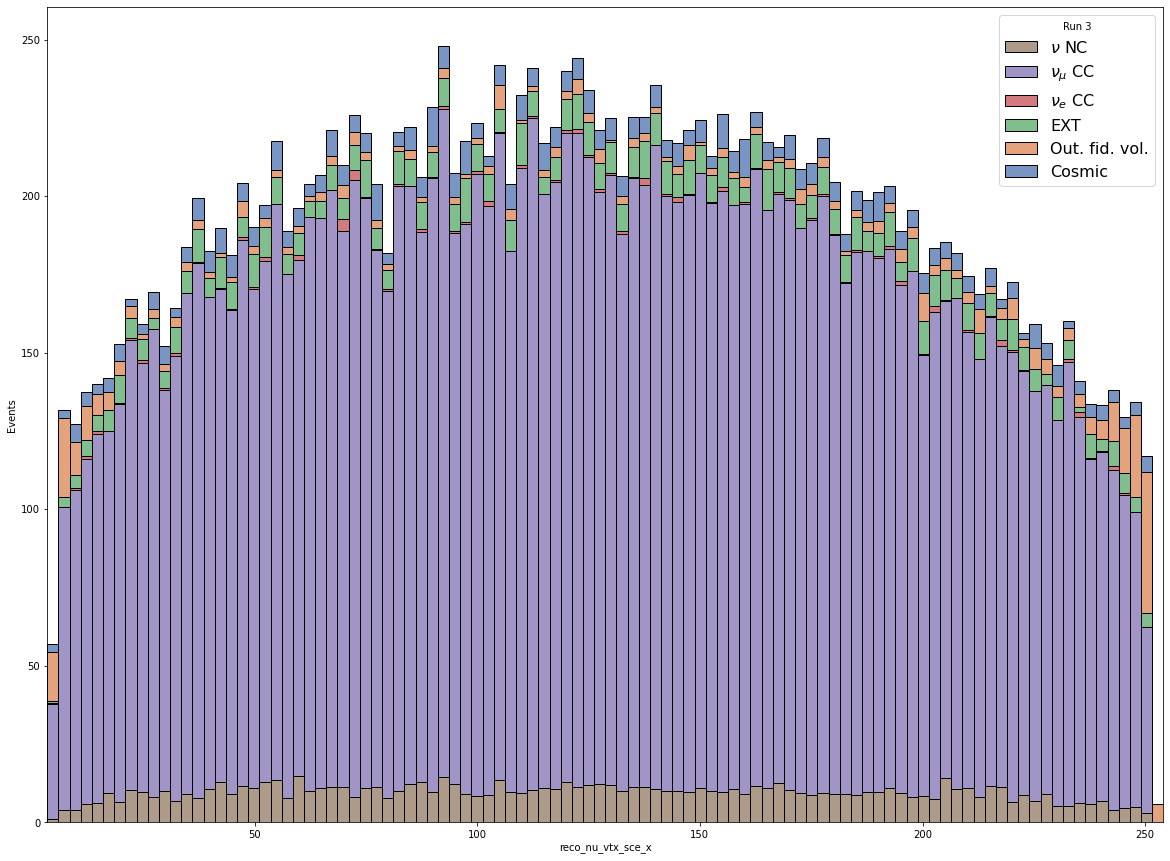

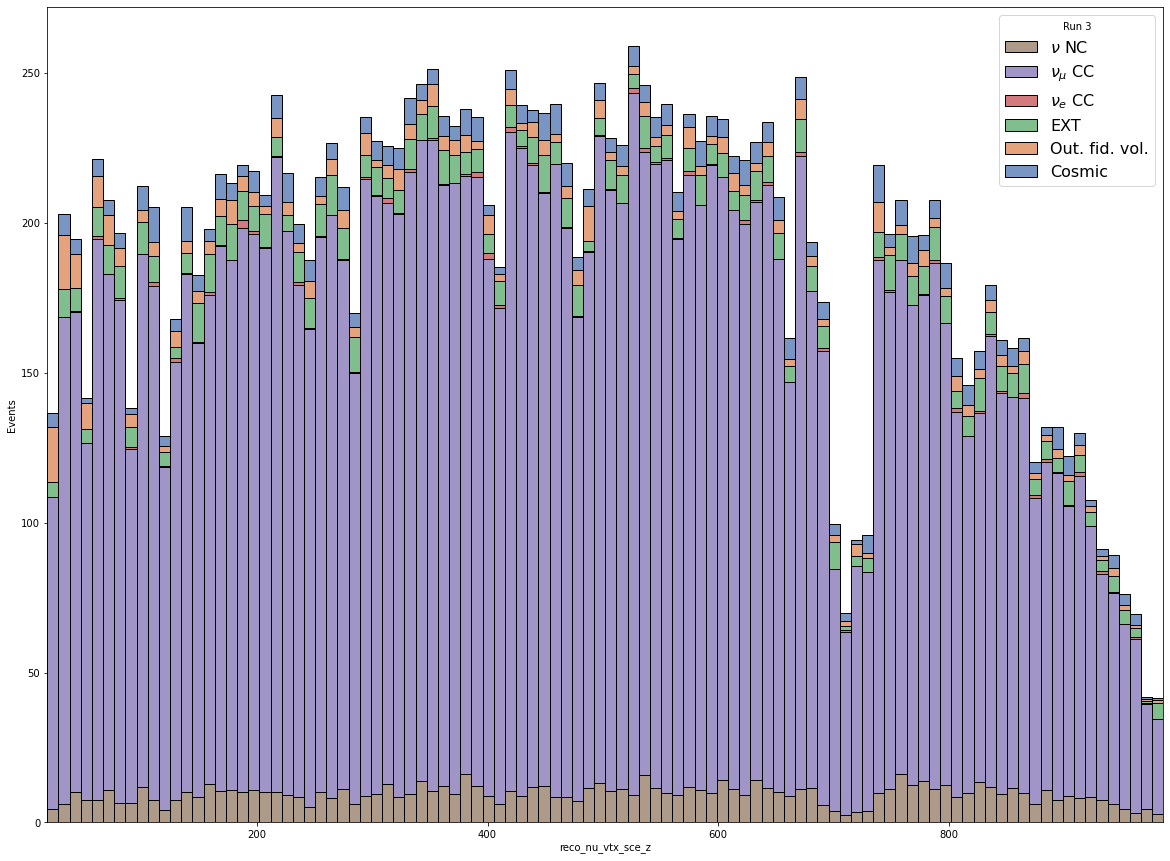

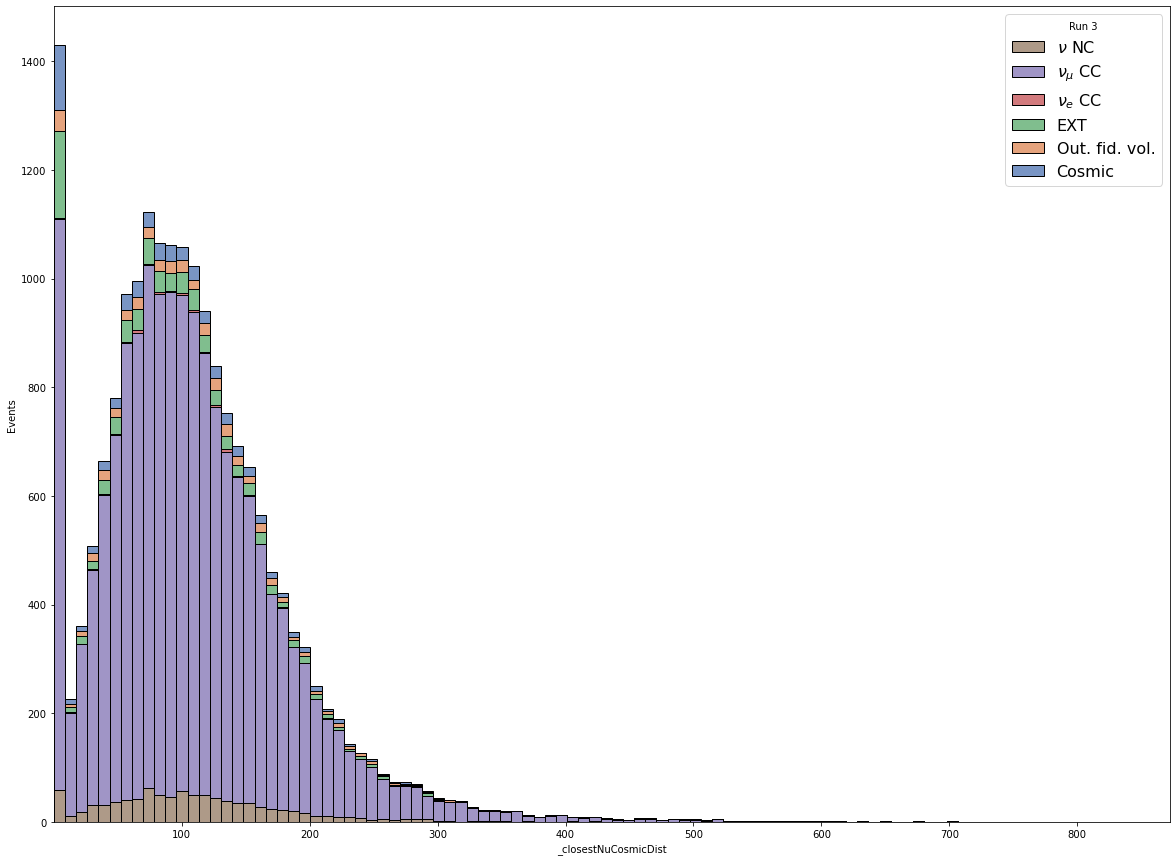

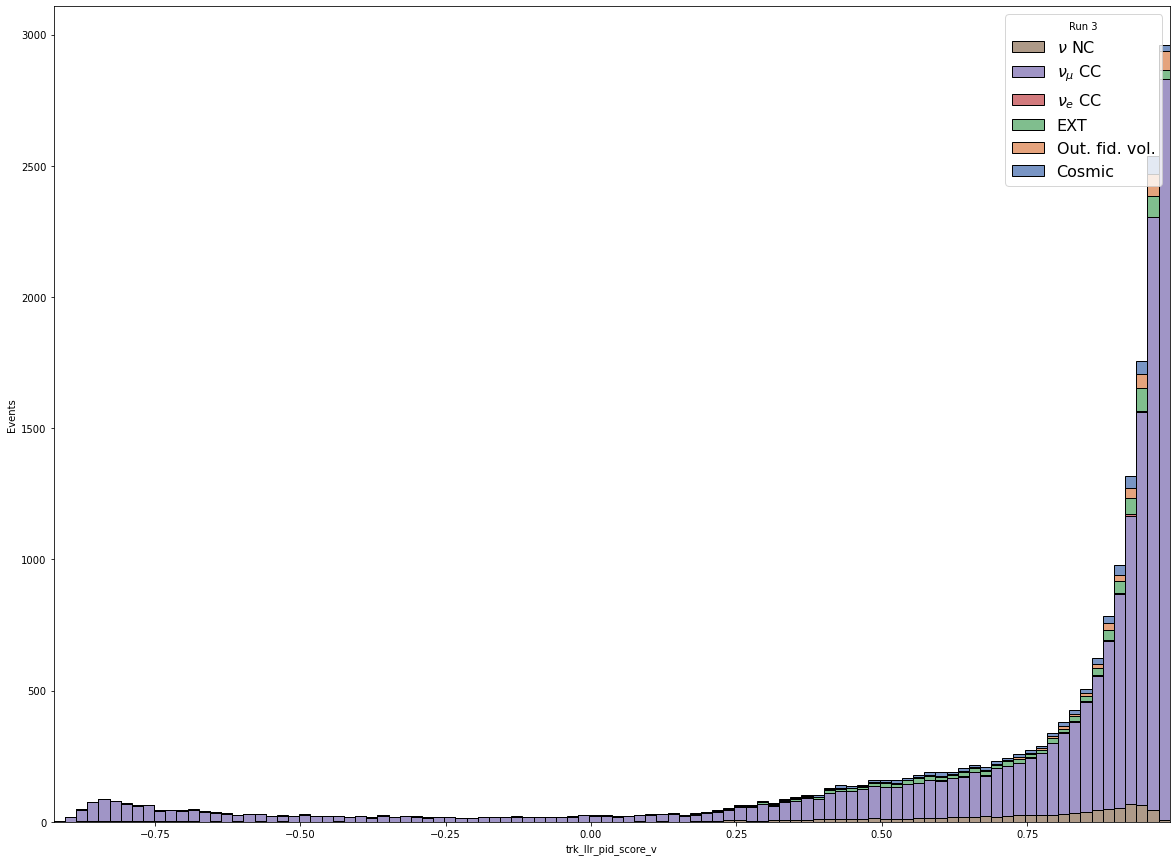

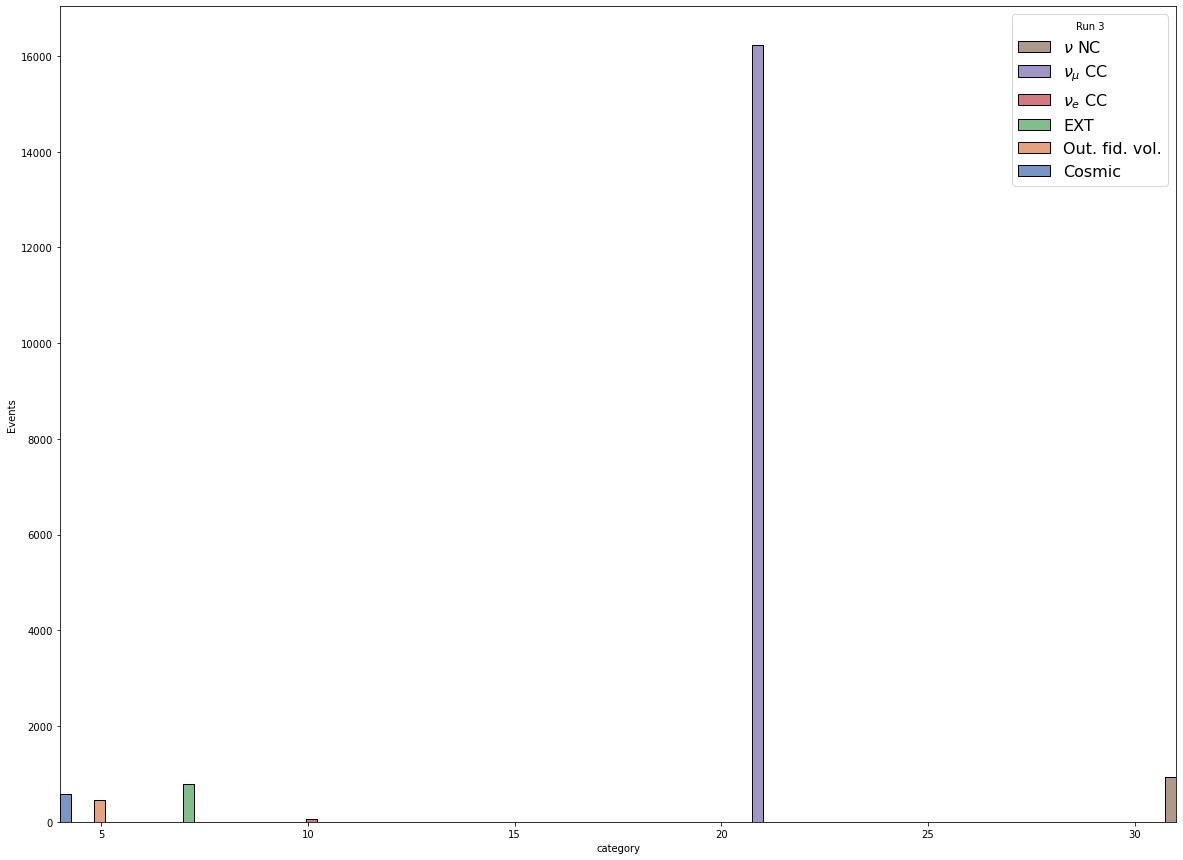

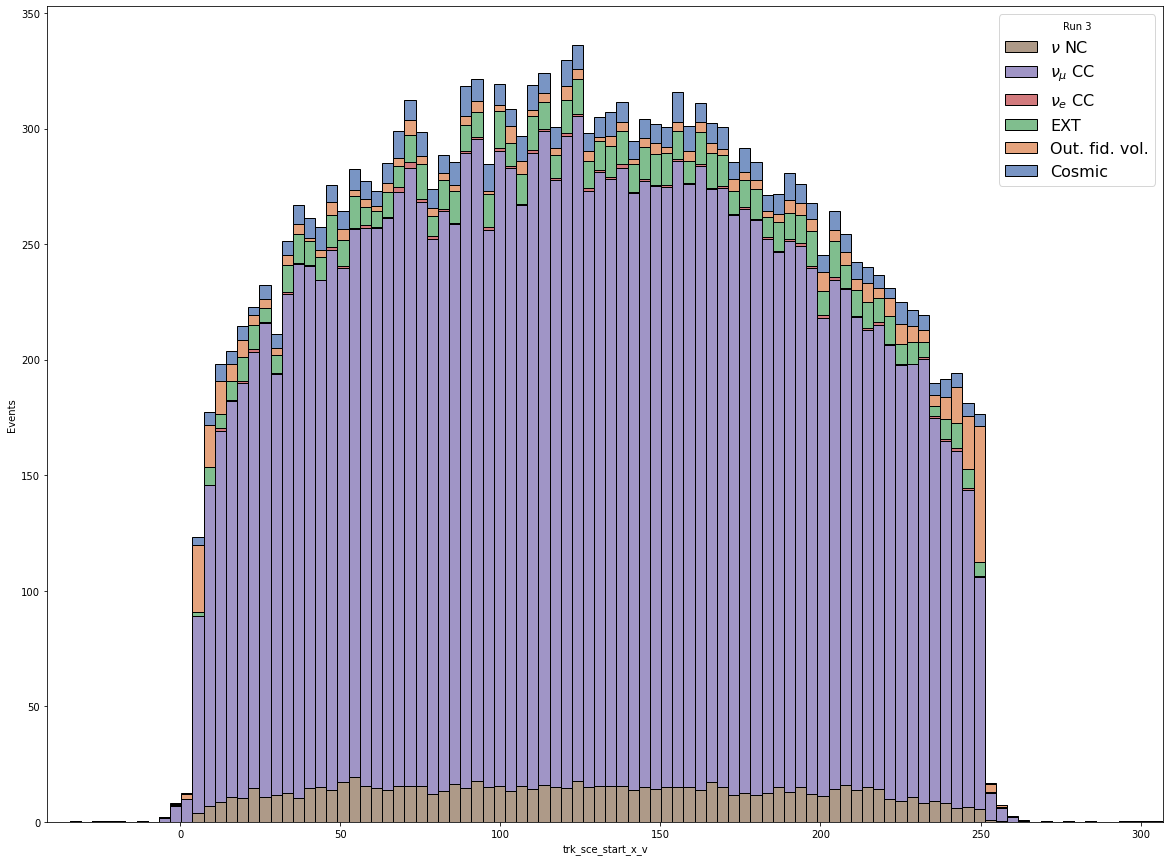

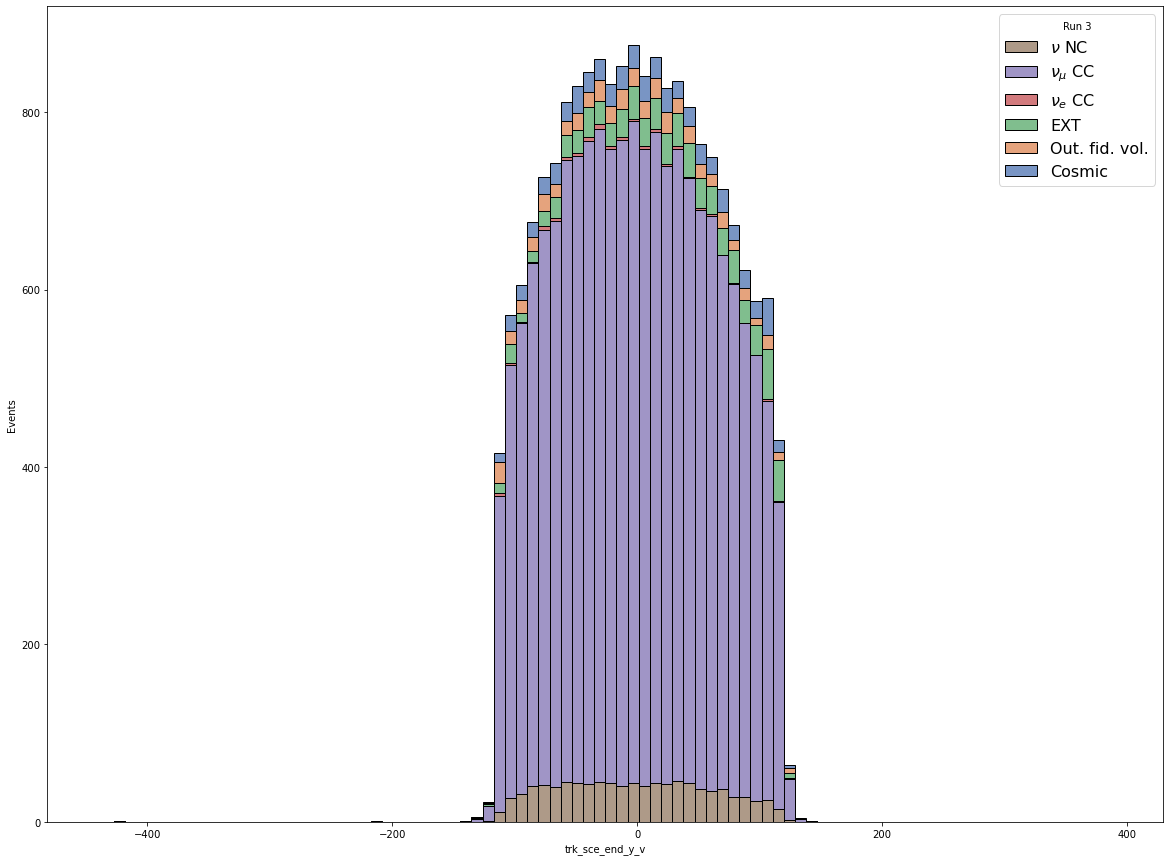

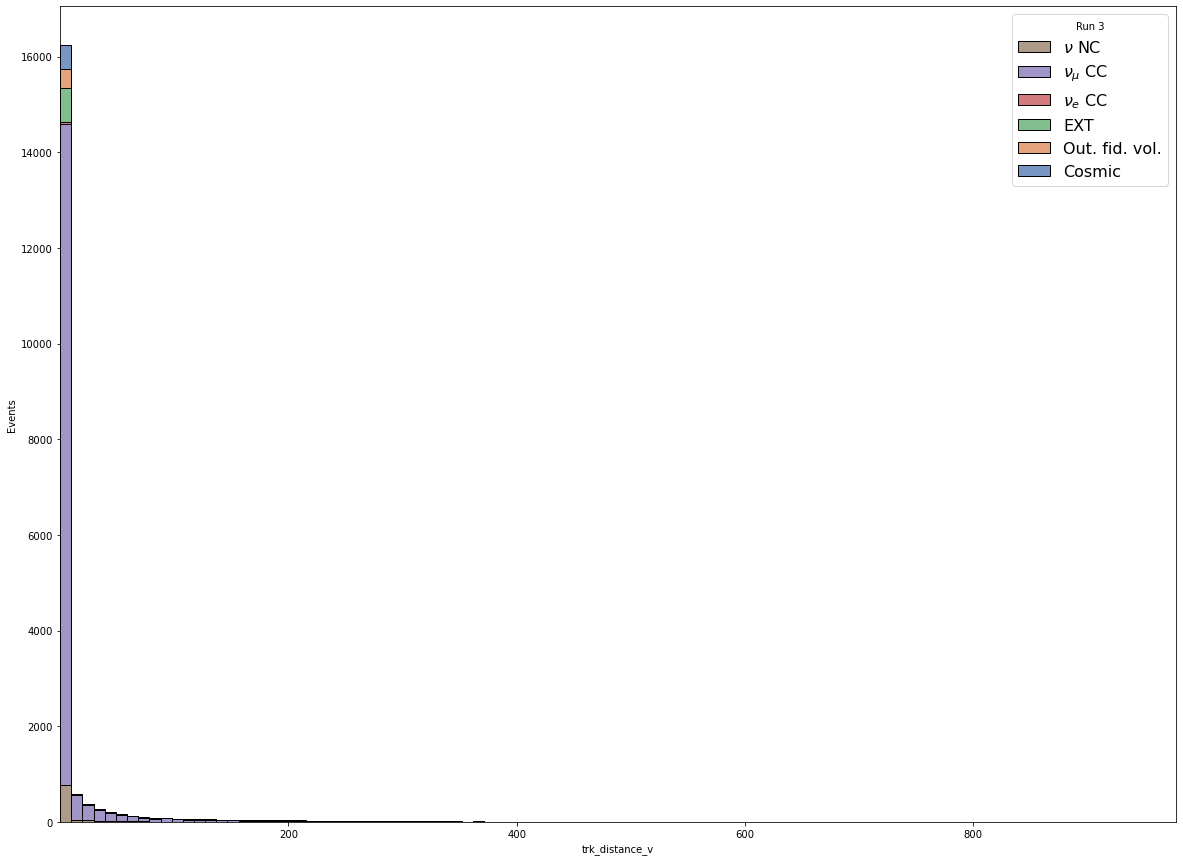

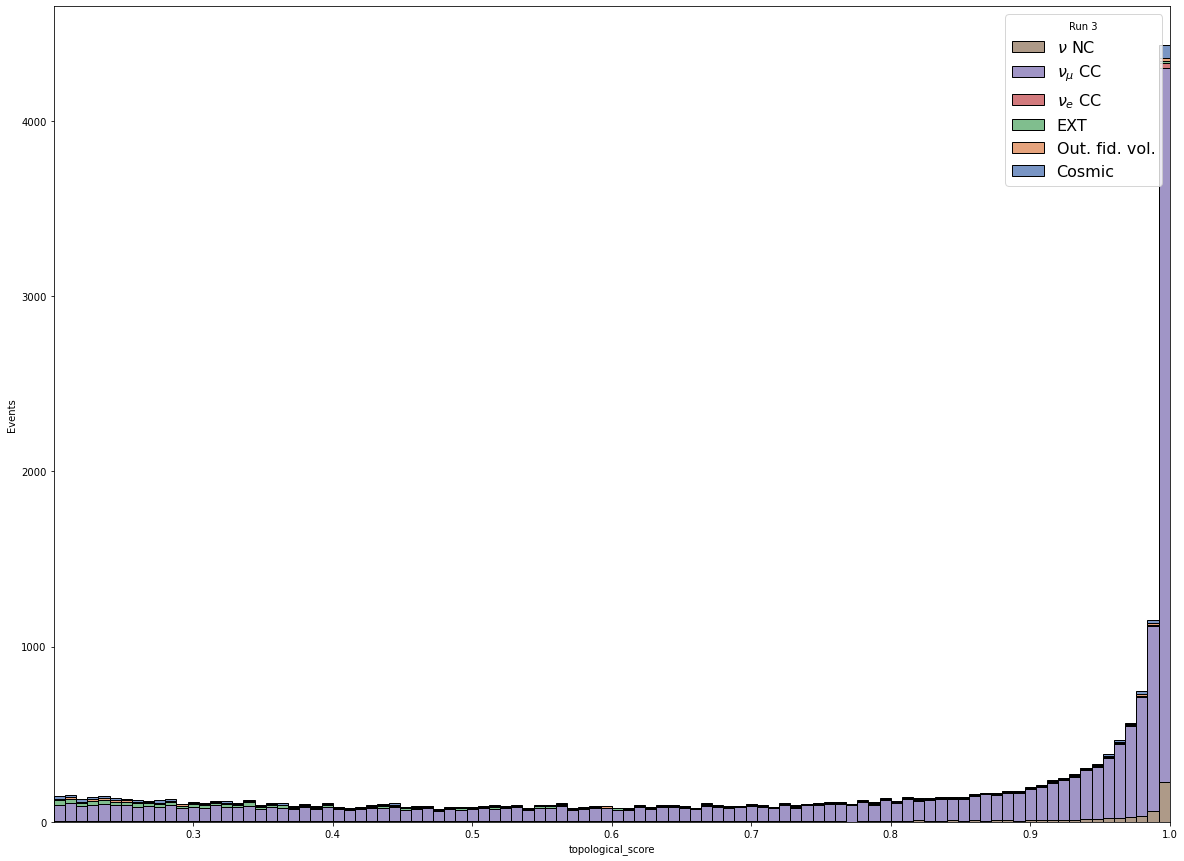

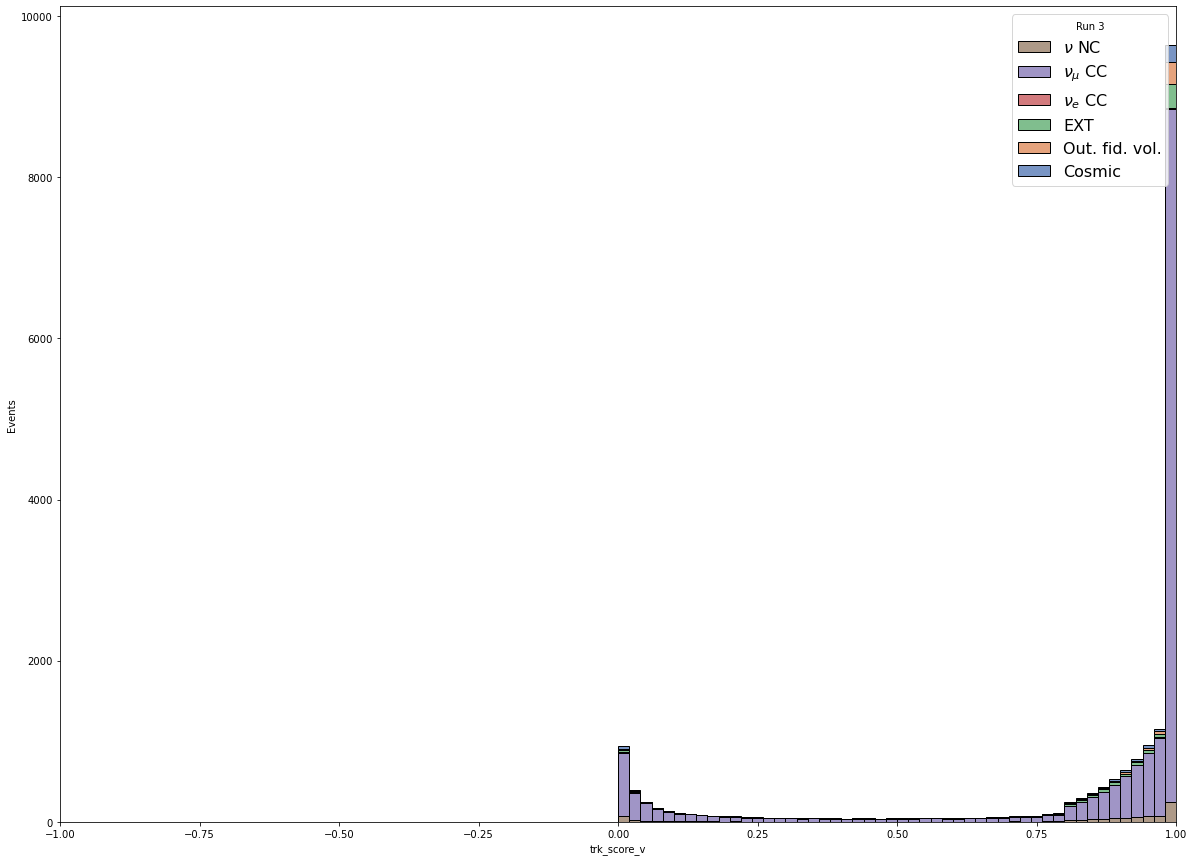

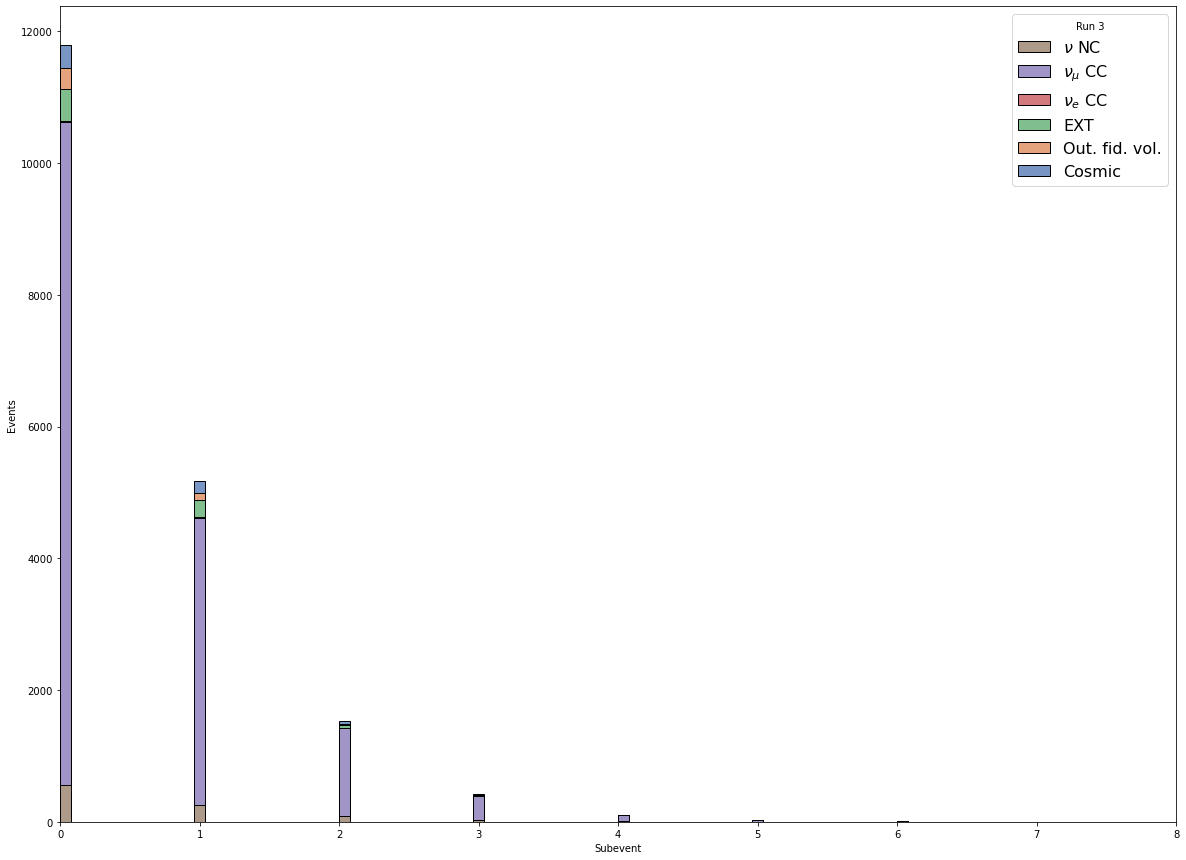

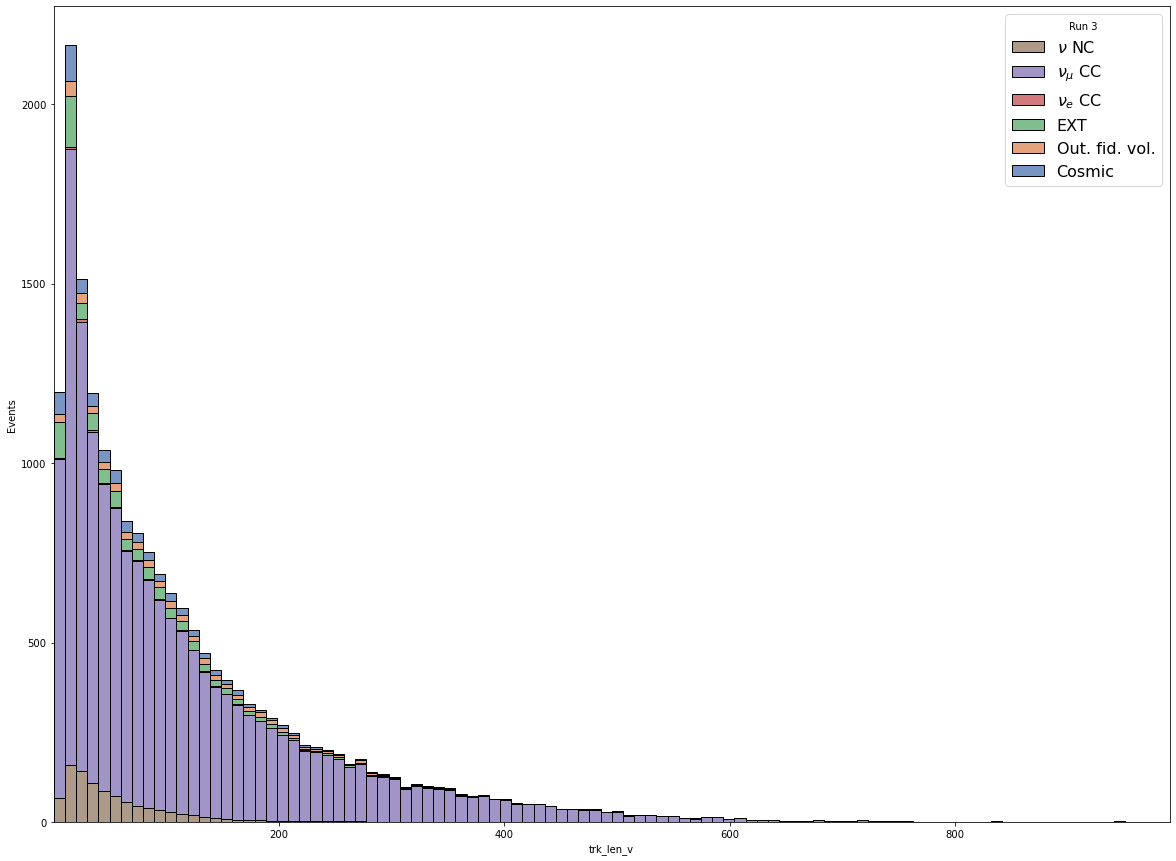

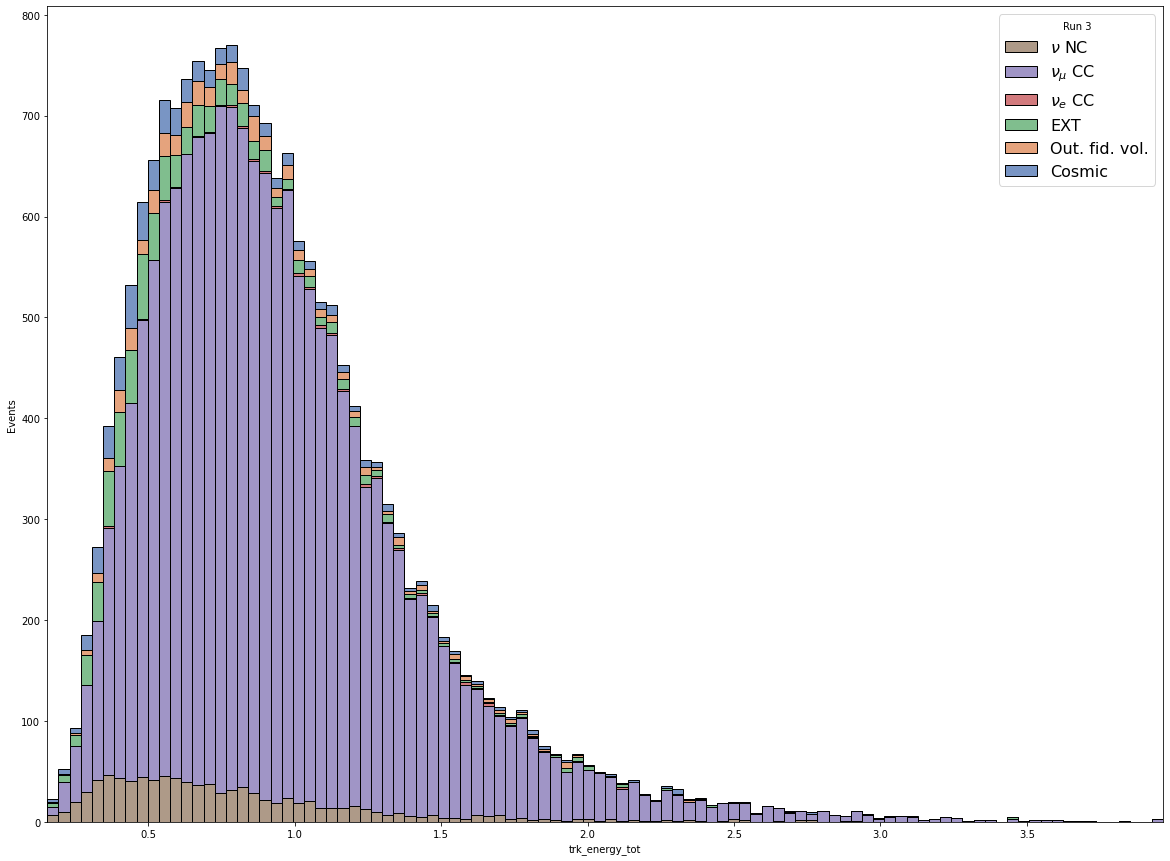

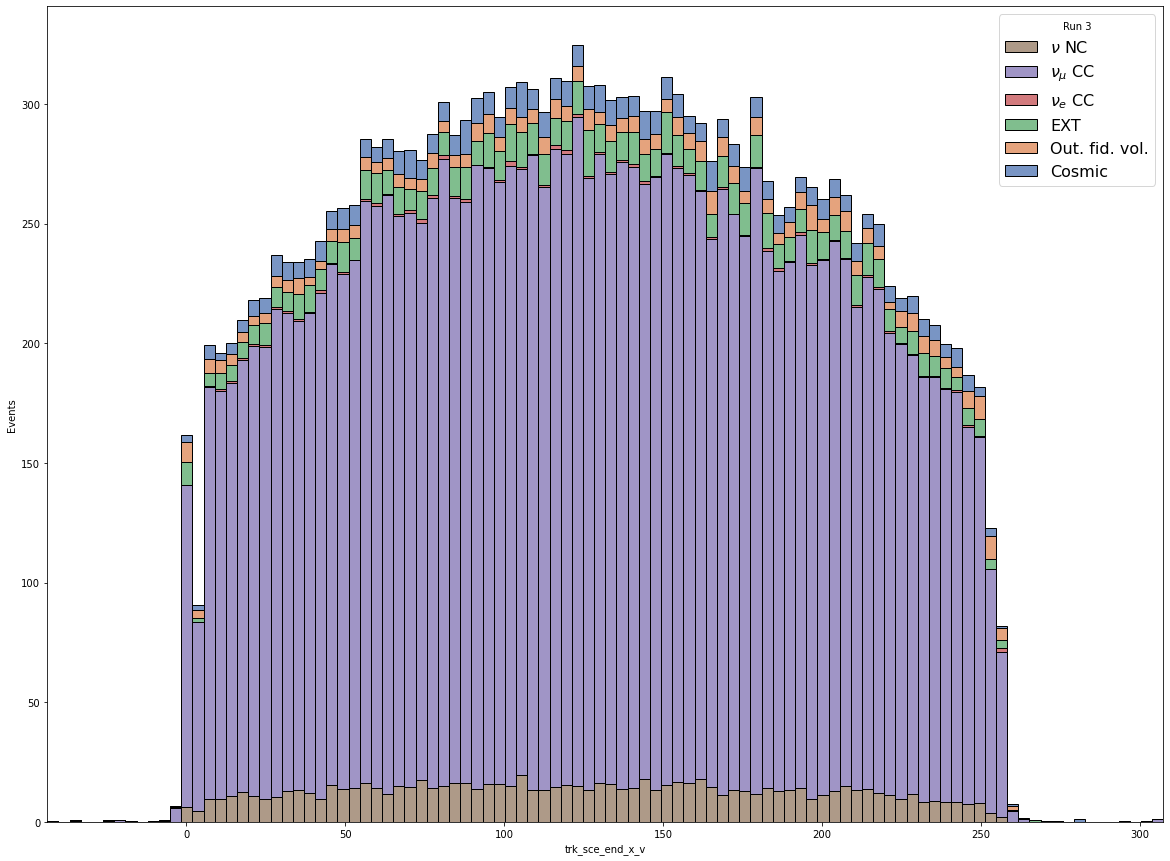

In [7]:
BIN = 100
# Common variables in both dataframes
all_variables_to_plot = list(set(list(MC_EXT)).intersection(list(data_frame)))

for item in all_variables_to_plot:
    plt.figure(figsize=(20,15))
    i = sns.histplot(data=MC_EXT, x=item, multiple="stack", hue="category", palette = 'deep', weights = MC_EXT['weight'], bins = BIN, legend = False)
    i.set(xlabel=item, ylabel = "Events")

    #plt.yscale('log')
    plt.xlim([np.min(MC_EXT[item]), np.max(MC_EXT[item])])
    plt.legend(title='Run 3',fontsize=16, loc='upper right', labels=[r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC", r"EXT", r"Out. fid. vol.", r"Cosmic"])
    plt.show(i)

# Check the purity and efficiency of the sample
It is recommended to plot purity and efficiency after each variable cut.

**HINT:** Function Selection() has commented lines of code that you may find useful for purpose of plotting changes in purity/efficiency after every cut.

### MOVE THE EFFICIENCY AND PURITY CALCULATIONS OUT OF THE CUTTING FUNCTION!
To do so would require the initial data to always be saved as a comparison. Which isn't a bad idea but is space inefficient (do it regardless).

In [8]:
# List of [signal entries , purity , label]. Can be appended each selection cut
#event = []
#event.append([len(frame[cat==21]['category']),len(frame[cat==21]['category'])/len(frame['category']),'basic'])

# efficiency currently put inside the cutting function. MOVE IT OUT

# Plot the energy spectrums here and normalise

Final representation of MC and data after applying the cuts 

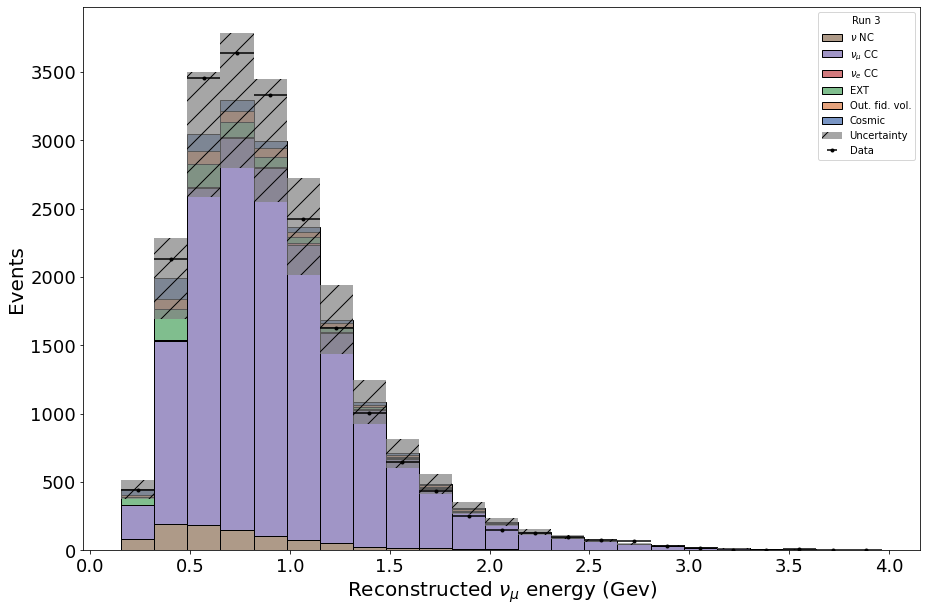

In [9]:
mc_dump, data_dump = Neutrino_functions.histogram_plot(MC_EXT, 'trk_energy_tot', 23, 'saved_figure_name', MC_EXT['weight'],xlims=[np.min(MC_EXT['trk_energy_tot']), np.max(MC_EXT['trk_energy_tot'])], plot_data = True, logscale = False, dataFrame = data_frame)
# mc_dump and data_dump give you the heights of the histograms

In [10]:
#print(MC_EXT)
print(MC_EXT['category'].unique())
print(MC_EXT['category'].value_counts())

[21 31  4  5 10  7]
21    91207
31     5936
4      3277
7      3061
5      2464
10      369
Name: category, dtype: int64


*You want to look at section 4.5 for all of this. Also you're wanting to be careful with the binning here! Not discussed at all in lab book*

# Oscillation and fitting

### Define functions and minimise chi square 
Write oscillation function and chi square. Apply oscillation function on MC data set and minimize chi square

In [11]:
# now we can get the chi_squared uncertainty here
def chi_squared_pearson(MC, data):
    '''
    Takes arrays/lists of MC entries and data entries and finds the chi squared values for each component.
    MC:     Monte_Carlo entries (per bin)
    data:   Truth data entries (per bin)
    '''
    
    numer = np.square(MC - data)
    denom = MC
    
    div = np.divide(numer, denom)
    
    
    
    return np.sum(div)

In [29]:
def oscillation_func(sin2thetasq, mass, E):
    """
    Variables needed to get probability out:
        mixing angle as sin squared 2 theta
        mass splitting (mass) 
        Length travelled (L) ~ 0.47km
        Energy (E) taken from reconstructed v_mu energy GeV (list)
        Pulled from:
        https://warwick.ac.uk/fac/sci/physics/staff/academic/boyd/stuff/neutrinolectures/lec_oscillations.pdf
        Page 3
    """
    
    L = 0.5 #km
    ### mass, is it squared already? I assume so
    
    # dividing one value by array of energies
    inside = 1.27 * mass * np.divide(L,E)
    sin_val = np.square(np.sin(inside))
    
    return (sin2thetasq * sin_val)

In [30]:
# So, minimise using best fit functions
def fit_func(data, theta, mass):
    entries, energies = data
    return entries * (1-oscillation_func(theta, mass, energies))


In [31]:
# need to collect correct bin energies
def energy_vals(MC, bins):
    """
    :MC: Monte Carlo data (pass in trk_energy_tot, category and weight)
    :bins: number of bins
    
    :bin_centers: centre of each bin across the range of energies, useful for "energy values" of each bin
    :bin_no: numpy array with list matching the MC data corresponding to which bin each data value would fall into
    
    """
        
    # if data has been cleaned, this will collect edge of bins
    bin_edges = np.linspace(np.min(MC['trk_energy_tot']), np.max(MC['trk_energy_tot']),bins+1,endpoint = True)
    
    # take bin centres
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # will leave digitise component for later
    
    return bin_centers

In [32]:
bin_centers = energy_vals(MC_EXT, 23)

In [33]:
popt, pcov = scipy.optimize.curve_fit(fit_func, (mc_dump, bin_centers), data_dump, bounds = ([0,0], [np.inf,np.inf]))
print(popt, pcov)

[8.30744437e-10 9.52213372e-10] [[0. 0.]
 [0. 0.]]


In [34]:
#print(1-oscillation_func(popt[0], popt[1], bin_centers))
print(mc_dump, data_dump)

[445.30565800539136, 1988.2423293666889, 3043.7701665435716, 3293.0923710803936, 2996.7326935893825, 2367.0834801109168, 1685.4395156249643, 1083.4546662537068, 709.0926550999384, 484.31956589244294, 309.5313551471027, 206.60557269480637, 134.8264082163423, 95.28670995200531, 69.8788348151682, 46.58079795847554, 35.891188657824074, 20.93927453672353, 14.684232917352702, 8.003456090930094, 6.1993323795898885, 2.543315848036878, 3.814973772055315] [441, 2131, 3458, 3640, 3329, 2421, 1627, 1002, 646, 435, 249, 152, 125, 96, 73, 69, 34, 19, 2, 4, 7, 0, 0]


In [41]:
# lets just try scaling all the data rather than just muon neutrinos. also makes the code easier
def chi_squared_mapping(MC_heights, data_heights, theta_list, mass_list, bin_centers):
    A = len(theta_list)
    B = len(mass_list)
    
    chi_square_map = np.zeros((A, B))
    
    # create double look for theta_list and mass_list
    for i in range(A):
        for j in range(B):
            
            # calculate the probability of oscillation for the bin_centers
            #### FLIPPING J AND I HERE MAKES THIS WORK. THEY ARE THE EXACT SAME LENGTH, SO GOD KNOWS WHY.
            p_vals = (1-oscillation_func(theta_list[j], mass_list[i], bin_centers))
            # apply these probability values to the heights of our MC data
            MC_heights_new = p_vals*MC_heights
            
            # check if MC_heights has zeroes in it
            if (0 in MC_heights_new):
                print("Zero detected in theta: {}, mass: {}".format(theta_list[j],mass_list[i]))
            ####print(theta_list[i], mass_list[j])
            
            # then save the chi_squared_values for the new MC_heights
            ### SEE, NOW I AND THEN J...WHY?
            chi_square_map[i,j] = chi_squared_pearson(MC_heights_new, data_heights)
            
            ###print("passed")
    return chi_square_map

In [42]:
# now lets try mapping the chi_square for two linspaces
increment = 100
theta_vals = np.linspace(0.001, 1, num = increment)
mass_vals = np.linspace(0.01, 100, num = increment)

In [43]:
chi_square_map = chi_squared_mapping(mc_dump, data_dump, theta_vals, mass_vals, bin_centers)

In [44]:
chi_square_div = np.divide(chi_square_map, 25)
print(chi_square_div)

[[8.70742162e+00 8.70752600e+00 8.70763038e+00 ... 8.71756350e+00
  8.71766824e+00 8.71777298e+00]
 [8.77507230e+00 9.49173251e+00 1.02710966e+01 ... 4.92623680e+03
  8.85372704e+03 8.54253309e+04]
 [8.77362309e+00 9.49750564e+00 1.03247355e+01 ... 7.14363343e+03
  9.17102911e+03 1.29121888e+04]
 ...
 [8.71277556e+00 8.78583682e+00 8.89395996e+00 ... 2.05195947e+03
  2.52565736e+03 3.43376200e+03]
 [8.73163169e+00 9.00116353e+00 9.31713217e+00 ... 3.04173704e+03
  4.16551968e+03 6.69970450e+03]
 [8.78356975e+00 9.61578507e+00 1.05663618e+01 ... 1.81113782e+04
  3.24231897e+04 3.04451398e+05]]


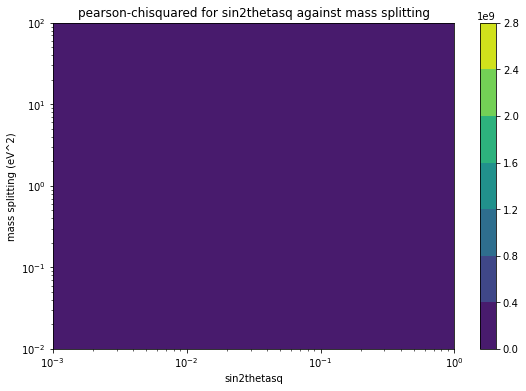

In [45]:
plt.figure(figsize = (9,6))
cont = plt.contourf(theta_vals, mass_vals, chi_square_div)
plt.colorbar(cont)
plt.title("pearson-chisquared for sin2thetasq against mass splitting")
plt.xlabel("sin2thetasq")
plt.ylabel("mass splitting (eV^2)")
plt.savefig("contour_map_new.png")
plt.yscale('log')
plt.xscale('log')
plt.show()

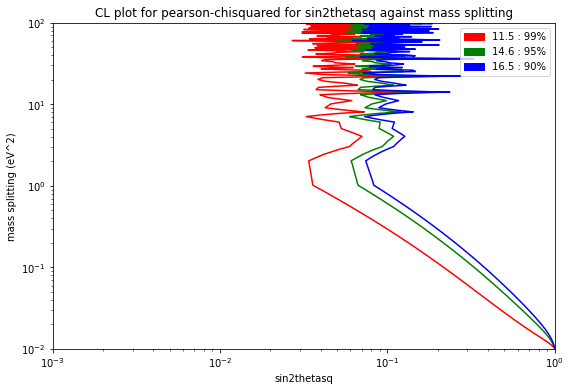

In [46]:
# Go plot the CL things. Plot 90%, 95%, 99%
# 90% rDOF = 19.768, 95% rDOF = 17.708, 99% rDOF = 14.257
plt.figure(figsize = (9,6))
colors =  ['red', 'green', 'blue']
CS = plt.contour(theta_vals, mass_vals, chi_square_div, [11.52398, 14.61141, 16.48341], colors = colors)
#plt.clabel(CS, fontsize=9, inline=1)



plt.title("CL plot for pearson-chisquared for sin2thetasq against mass splitting")
plt.xlabel("sin2thetasq")
plt.ylabel("mass splitting (eV^2)")

plt.xscale('log')
plt.yscale('log')

# legend production
labels = ['99%', '95%', '90%']
#for i in range(len(labels)):
#    CS.collections[i].set_label(labels[i])
h = CS.collections
l = [f'{a:.1f}'for a in CS.levels]
l = [l[i] + (" : " + str(labels[i])) for i in range(len(CS.levels))]
proxy = [plt.Rectangle((0,0),1,1,color = colors[i]) for i in range(len(colors))]
plt.legend(proxy,l)
#plt.legend(loc='lower left')

plt.savefig("CL_map.png")
plt.show()

### 3+1 neutrino model

make new probability oscillation functions for the 3+1 model, apply them to get a result

# Compare your result with MiniBooNE

Results are extracted from MiniBooNE (orange) and LSND (blue)

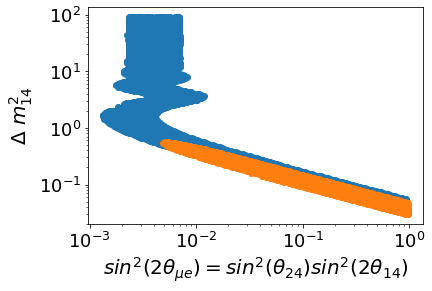

In [27]:
# Load data
LSND_data = pd.read_csv('./data/DataSet_LSND.csv').to_numpy()
MiniBooNE_data = pd.read_csv('./data/DataSet_MiniBooNE.csv').to_numpy()

# Plot data
plt.plot(LSND_data[:,0],LSND_data[:,1],'o')
plt.plot(MiniBooNE_data[:,0],MiniBooNE_data[:,1],'o')

plt.xlabel(r'$sin^2(2\theta_{\mu e})=sin^2(\theta_{24})sin^2(2\theta_{14})$',fontsize=20)
plt.ylabel(r'$\Delta$ $m_{14}^2$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.xscale('log')
plt.show()